In [1]:
from PIL import Image
import imagehash
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import hamming
from collections import deque
from pprint import pprint
import skimage
import cv2
%matplotlib inline

imgs = sorted(list(Path(r'C:\trashcam_images2').glob('**/*.jpg')))

In [2]:
len(imgs)

205969

In [3]:
from time import time

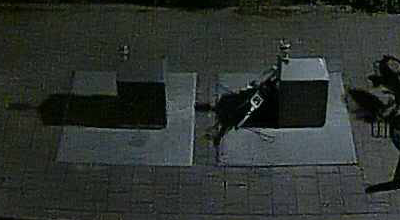

In [13]:
crop = (460,410,860,630)

def get_small_im(i):
    im = Image.open(imgs[i],'r')
    return im.crop(crop)
im = get_small_im(23556)
im

In [16]:
codec = 'mp4v'
writer = cv2.VideoWriter('trashcam 2.avi'.format(codec), cv2.VideoWriter_fourcc(*codec), 100, (crop[2]-crop[0],crop[3]-crop[1]), True)
t = time()
for i in range(0,len(imgs)):
    im = cv2.imread(str(imgs[i]))
    writer.write(im[crop[1]:crop[3],crop[0]:crop[2],:])
    if i % 1000 == 0:
        print(i, time() - t, i/len(imgs)*100)
        t = time()
cv2.destroyAllWindows()
writer.release()

0 0.013012170791625977 0.0
1000 14.844926357269287 0.4855099553816351
2000 16.48092794418335 0.9710199107632702
3000 16.402172327041626 1.4565298661449053
4000 16.41083073616028 1.9420398215265404
5000 16.560281991958618 2.4275497769081755
6000 16.520858764648438 2.9130597322898106
7000 16.59696388244629 3.3985696876714453
8000 16.260144472122192 3.884079643053081
9000 15.674579620361328 4.3695895984347155
10000 15.614917278289795 4.855099553816351
11000 15.622207641601562 5.340609509197987
12000 15.572858095169067 5.826119464579621
13000 15.567653894424438 6.311629419961257
14000 15.609853506088257 6.797139375342891
15000 15.603474617004395 7.282649330724526
16000 15.591434001922607 7.768159286106162
17000 15.630658149719238 8.253669241487795
18000 15.600765705108643 8.739179196869431
19000 15.611968755722046 9.224689152251067
20000 15.622920274734497 9.710199107632702
21000 15.63469672203064 10.195709063014338
22000 15.78827714920044 10.681219018395973
23000 15.809382438659668 11.166

In [5]:
writer = cv2.VideoWriter('trashcam_mp4v.avi', cv2.VideoWriter_fourcc(*'mp4v'), 100, (crop[2]-crop[0],crop[3]-crop[1]), True)
t = time()
for i in range(1000):
    im = cv2.imread(str(imgs[i]))
    writer.write(im[crop[1]:crop[3],crop[0]:crop[2],:])
    if i % 100 == 0:
        print(i, time() - t, i/len(imgs)*100)
        t = time()
cv2.destroyAllWindows()
writer.release()

0 0.013011693954467773 0.0
100 2.7701478004455566 0.06198398333870528
200 1.8223986625671387 0.12396796667741056
300 1.9028398990631104 0.18595195001611584
400 1.7315890789031982 0.24793593335482111
500 1.23002290725708 0.30991991669352636
600 1.229095697402954 0.37190390003223167
700 1.2287297248840332 0.433887883370937
800 1.2298393249511719 0.49587186670964223
900 1.2290310859680176 0.5578558500483475


In [10]:
writer = cv2.VideoWriter('trashcam_h264.avi', cv2.VideoWriter_fourcc(*'H264'), 100, (crop[2]-crop[0],crop[3]-crop[1]), True)
t = time()
for i in range(1000):
    im = cv2.imread(str(imgs[i]))
    writer.write(im[crop[1]:crop[3],crop[0]:crop[2],:])
    if i % 100 == 0:
        print(i, time() - t, i/len(imgs)*100)
        t = time()
cv2.destroyAllWindows()
writer.release()

0 0.011011600494384766 0.0
100 2.073038339614868 0.06198398333870528
200 2.041947603225708 0.12396796667741056
300 2.287179470062256 0.18595195001611584
400 2.2886881828308105 0.24793593335482111
500 2.4508426189422607 0.30991991669352636
600 2.316746473312378 0.37190390003223167
700 1.3953404426574707 0.433887883370937
800 1.1413342952728271 0.49587186670964223
900 1.1379234790802002 0.5578558500483475


In [11]:
writer = cv2.VideoWriter('trashcam_x264.avi', cv2.VideoWriter_fourcc(*'X264'), 100, (crop[2]-crop[0],crop[3]-crop[1]), True)
t = time()
for i in range(1000):
    im = cv2.imread(str(imgs[i]))
    writer.write(im[crop[1]:crop[3],crop[0]:crop[2],:])
    if i % 100 == 0:
        print(i, time() - t, i/len(imgs)*100)
        t = time()
cv2.destroyAllWindows()
writer.release()

0 0.012011289596557617 0.0
100 2.4001688957214355 0.06198398333870528
200 2.3232131004333496 0.12396796667741056
300 2.2381412982940674 0.18595195001611584
400 1.1613311767578125 0.24793593335482111
500 1.1354994773864746 0.30991991669352636
600 1.1281788349151611 0.37190390003223167
700 1.127303123474121 0.433887883370937
800 1.1305837631225586 0.49587186670964223
900 1.1262307167053223 0.5578558500483475


In [4]:
cap = cv2.VideoCapture(video_name) #video_name is the video being called
cap.set(1,frame_no); # Where frame_no is the frame you want
ret, frame = cap.read() # Read the frame
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

NameError: name 'video_name' is not defined